In [1]:
import torch
from torch import nn, optim
from sklearn.datasets import load_wine

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
import torch
from torch import nn, optim
from sklearn.datasets import load_wine
from torch.utils.data import  TensorDataset, DataLoader
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

wine = load_wine()

In [21]:
import pandas as pd
import numpy as np
df=pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
print(df.head())

   alcohol  malic_acid   ash  ...  od280/od315_of_diluted_wines  proline  target
0    14.23        1.71  2.43  ...                          3.92   1065.0       0
1    13.20        1.78  2.14  ...                          3.40   1050.0       0
2    13.16        2.36  2.67  ...                          3.17   1185.0       0
3    14.37        1.95  2.50  ...                          3.45   1480.0       0
4    13.24        2.59  2.87  ...                          2.93    735.0       0

[5 rows x 14 columns]


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#warning
import warnings
warnings.filterwarnings('ignore')

In [22]:
corr_df = df.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
corr_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.00,0.09,0.21,-0.31,0.27,0.29,0.24,-0.16,0.14,0.55,-0.07,0.07,0.64,-0.33
malic_acid,0.09,1.00,0.16,0.29,-0.05,-0.34,-0.41,0.29,-0.22,0.25,-0.56,-0.37,-0.19,0.44
ash,0.21,0.16,1.00,0.44,0.29,0.13,0.12,0.19,0.01,0.26,-0.07,0.00,0.22,-0.05
alcalinity_of_ash,-0.31,0.29,0.44,1.00,-0.08,-0.32,-0.35,0.36,-0.20,0.02,-0.27,-0.28,-0.44,0.52
magnesium,0.27,-0.05,0.29,-0.08,1.00,0.21,0.20,-0.26,0.24,0.20,0.06,0.07,0.39,-0.21
total_phenols,0.29,-0.34,0.13,-0.32,0.21,1.00,0.86,-0.45,0.61,-0.06,0.43,0.70,0.50,-0.72
flavanoids,0.24,-0.41,0.12,-0.35,0.20,0.86,1.00,-0.54,0.65,-0.17,0.54,0.79,0.49,-0.85
nonflavanoid_phenols,-0.16,0.29,0.19,0.36,-0.26,-0.45,-0.54,1.00,-0.37,0.14,-0.26,-0.50,-0.31,0.49
proanthocyanins,0.14,-0.22,0.01,-0.20,0.24,0.61,0.65,-0.37,1.00,-0.03,0.30,0.52,0.33,-0.50
color_intensity,0.55,0.25,0.26,0.02,0.20,-0.06,-0.17,0.14,-0.03,1.00,-0.52,-0.43,0.32,0.27


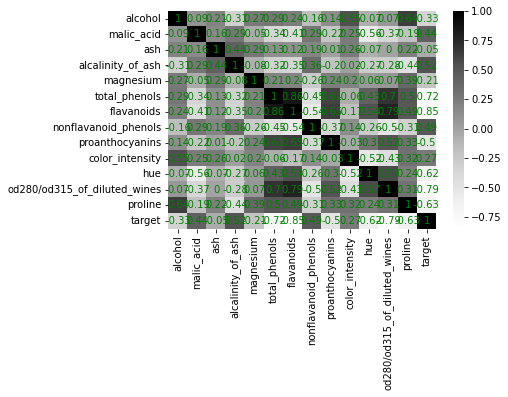

In [23]:
ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='g'), cmap='Greys')
plt.show()

In [27]:
column_new = ['malic_acid', 'alcalinity_of_ash', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins','hue','od280/od315_of_diluted_wines','proline']
wine_data = df[column_new]

In [32]:
wine_data.shape

(178, 9)

In [33]:
input = wine_data.values
output = wine.target
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.33, random_state=42,stratify=output,shuffle = True)



In [29]:
print(y_train)

[0 0 0 0 1 0 2 1 2 0 1 2 1 1 0 0 0 1 1 0 1 1 1 1 2 2 1 0 2 1 2 1 0 2 1 1 1
 1 1 0 0 0 0 0 0 1 1 2 0 2 1 0 1 2 0 2 1 1 1 0 1 0 1 1 0 2 2 0 0 1 2 0 0 2
 1 1 2 2 2 2 1 1 0 0 1 1 2 2 1 1 2 0 0 0 2 1 2 1 2 2 0 1 1 0 1 1 2 0 2 0 0
 1 1 2 0 2 1 2 1]


In [34]:
print(X_train[0])
print(y_train[0])

[1.73e+00 1.60e+01 2.60e+00 2.76e+00 2.90e-01 1.81e+00 1.15e+00 2.90e+00
 1.32e+03]
0


In [35]:
class CustomDataset(Dataset):
  def __init__(self):
    
    self.x_data = X_train
    self.y_data = [[y] for y in y_train]

  def __len__(self):

    return len(self.x_data)

  def __getitem__(self, idx):

    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)

    return x,y

In [36]:
batch_size = 8

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size)

In [44]:
 model = nn.Sequential(
          nn.Linear(9, 100, bias=True),  
          nn.Sigmoid(),
          nn.Linear(100, 100, bias=True), 
          nn.Sigmoid(),
          nn.Linear(100, 3, bias=True), 
          nn.Softmax()
          ).to(device)

In [45]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(9, 100, bias=True), # input_layer = 2, hidden_layer1 = 10 
          nn.Sigmoid(),

  # activation function 이용 
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함 
  #   파라미터가 필요하지 않다는 것이 특징
        nn.BatchNorm1d(100)

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨 
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨 


    )
    self.layer2 = nn.Sequential(
          nn.Linear(100, 100, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
        nn.Sigmoid()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(100, 100, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
        nn.Sigmoid()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(100, 3, bias=True), # hidden_layer3 = 10, output_layer = 1
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [46]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

In [47]:
model = Model().to(device)
model.apply(init_weights)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=9, out_features=100, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=100, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [48]:
print(model)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=9, out_features=100, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=100, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)


In [49]:
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.5)

In [50]:
losses = []
for epoch in range(100):

  for x, y in dataloader:
    optimizer.zero_grad()
    x = x.to(device)
    y = y.to(device)

    # forward 연산
    hypothesis = model(x)

    # 비용 함수
    y = y.squeeze()
    cost = loss_fn(hypothesis, y)
    cost.backward()
    optimizer.step()
  losses.append(cost.item()) # 값만 가져오기 위해서 .item()

  # 10의 배수에 해당되는 에포크마다 비용을 출력
  if epoch % 10 == 0:
      print(epoch, cost.item())

0 1.0992778539657593
10 1.12117600440979
20 1.10701322555542
30 1.1051629781723022
40 1.1058006286621094
50 1.1066486835479736
60 1.1072219610214233
70 1.1076253652572632
80 1.1078999042510986
90 1.1080949306488037


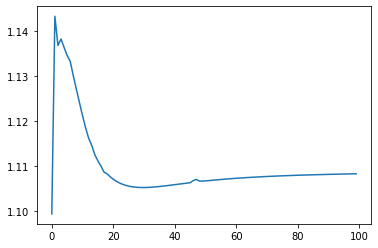

In [51]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

In [52]:
import numpy as np
with torch.no_grad():

    model = model.to('cpu')
    X_test = torch.FloatTensor(X_test)
    y_pred = model(X_test)

    y_pred = y_pred.detach().numpy() # tensor를 numpy로 바꿈
    predicted = np.argmax(y_pred,axis=1)
    print(f'model의 output은 :  {y_pred[0]}' )
    print(f'argmax를 한 후의 output은 {predicted[0]}')
    accuracy = (accuracy_score(predicted,y_test))
    print(f'accuracy는 {accuracy}')

model의 output은 :  [0.2983739  0.54713774 0.15448835]
argmax를 한 후의 output은 1
accuracy는 0.3898305084745763
